In [11]:
import numpy as np
import matplotlib.pyplot as plt
from nested import nested_mult
import pandas as pd
from jupyterthemes import jtplot
jtplot.style()

2.2344969487553255 2.2627756906819614


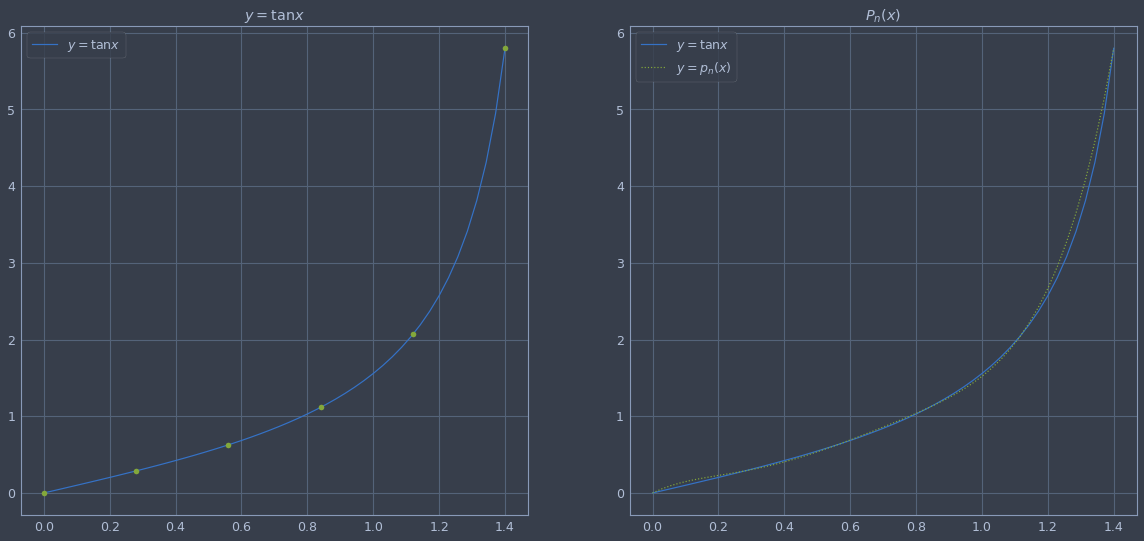

In [74]:
def n_interp(x,X,Y):
    """Polinomio de interpolacion de lagrange. X y Y data points y x puntos de evaluacion"""
    
    def Lk(x,X,k):
        """Assumes k integer with 0<k<=n, where n is the number of data points"""
        l = 1
        for j in range(len(X)):
            if j==k-1:
                continue
            l *= (x-X[j])/(X[k-1]-X[j])
        return l
    
    polinomio = 0
    for k in range(1,len(X)+1):
        polinomio += Y[k-1]*Lk(x,X,k)
    return polinomio


n=6 #numero de la interpolacion
#aqui se generan los nodos o puntos con los que se hará el polinomio
X2=np.linspace(0, 1.4,n) 
Y2 = np.tan(X2)
print(np.tan(1.15),n_interp(1.15,X2,Y2))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9))
xr = np.linspace(0, 1.4)
ax1.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax1.plot(X2, Y2, "o")
ax1.set_title(r"$y = \tan x$")
ax1.legend()

xr =np.linspace(0, 1.4) # np.linspace(1.08, 1.22)
yr = np.tan(xr)
ax2.set_title(r"$P_n(x)$")
ax2.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax2.plot(xr, n_interp(xr,X2,Y2), ":", label=r"$y = p_n(x)$")
ax2.legend()

In [19]:
def newtdd(x,y):
    """Newton Divided Difference Interpolation Method.
    Computes coefficients of interpolating polynomial
    Input: x and y are arrays containing x and y coordinates of the n data points
    Output: Coefficients c of interpolating polynomial in nested form, constant term first"""
    n=len(x)
    v = np.zeros((n,n))
    for j in range(n):
        v[j,0] = y[j]
    for i in range(1,n):
        for k in range(n-i):
            v[k,i] = (v[k+1,i-1]-v[k,i-1])/(x[k+i]-x[k]) 
    c = []
    for i in range(n):
        c.append(v[0,i])
    return np.array(c)

In [3]:
x0=[0, 2, 3]
y0=[1, 2, 4]
coeff=newtdd(x0,y0)

In [4]:
poly=nested_mult(coeff=coeff,b=[0,2])

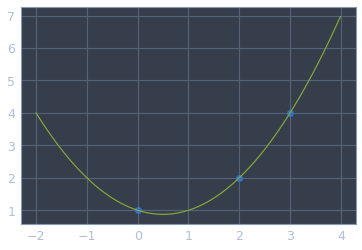

In [5]:
x=np.arange(-2,4,0.01)
plt.plot(x0,y0,'o',markersize=7)
plt.plot(x,poly(x))

In [3]:
x0=[0, np.pi/6, np.pi/3,np.pi/2]
y0=np.sin(x0)
coeff=newtdd(x0,y0)

In [4]:
interpolated = nested_mult(coeff,b=[0,np.pi/6,np.pi/3])

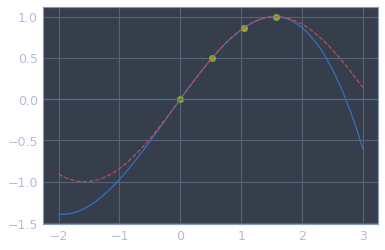

In [5]:
x=np.linspace(-2,3)
plt.plot(x,interpolated(x))
plt.plot(x0,y0,'o',markersize=7)
plt.plot(x,np.sin(x),'--')
plt.axhline()

In [6]:
error=abs(np.sin(x)-interpolated(x))
df=pd.DataFrame({'x':x,'sinx':np.sin(x),'p(x)':interpolated(x),'error':error})

In [9]:
df

,x,sinx,p(x),error
0,-2.000000,-0.909297,-1.391765,0.482468
1,-1.897959,-0.946958,-1.394041,0.447083
2,-1.795918,-0.974767,-1.384178,0.409411
3,-1.693878,-0.992435,-1.362902,0.370467
4,-1.591837,-0.999779,-1.330939,0.331160
5,-1.489796,-0.996721,-1.289015,0.292294
6,-1.387755,-0.983295,-1.237856,0.254561
7,-1.285714,-0.959639,-1.178188,0.218549
8,-1.183673,-0.925999,-1.110736,0.184737
9,-1.081633,-0.882726,-1.036228,0.153502


#### Runge Exmaple

Interpolate f (x) = 1/(1 + 12x 2 ) at evenly spaced points in [−1, 1].
This is called the Runge example. The function has the same general shape as a
triangular bump. The following figures shows the result of the interpolation, behavior that is characteristic of the Runge phenomenon: polynomial wiggle near the ends of the interpolation interval.

In [69]:
def runge_example(numpoints=15):
    def f(x):
        return 1/(1+12*x**2)
    x = np.linspace(-1,1,num=numpoints)
    c=newtdd(x,f(x))
    g=nested_mult(c,b=x[:-1])
    x1=np.linspace(-1.2,1.2,num=numpoints*16)
    plt.plot(x1,g(x1))
    plt.plot(x,f(x),'o')
    plt.plot(x1,f(x1),'--')
    plt.ylim(-2,2)
    plt.axhline()

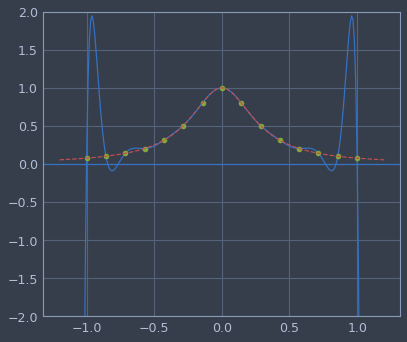

In [70]:
runge_example()

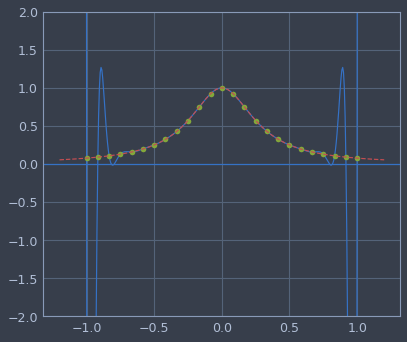

In [71]:
runge_example(25)

As we have seen, examples with the Runge phenomenon characteristically have large
error near the outside of the interval of data points. The cure for this problem is intuitive:
Move some of the interpolation points toward the outside of the interval, where the function
producing the data can be better fit. We will see how to accomplish this in the next section
on Chebyshev interpolation

3. The total world oil production in millions of barrels per day is shown in the table that follows.
Determine and plot the degree 9 polynomial through the data. Use it to estimate 2010 oil
production. Does the Runge phenomenon occur in this example? In your opinion, is the
interpolating polynomial a good model of the data? Explain.

year:
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003

bbl/day (×10^6 ):
67.052
68.008
69.803
72.024
73.400
72.063
74.669
74.487
74.065
76.777

In [38]:
year = np.arange(1994,2004)
bbl4year = np.array([67.052, 68.008, 69.803, 72.024, 73.400, 72.063, 74.669, 74.487, 74.065, 76.777])*1e6

In [39]:
c=newtdd(year,bbl4year)

In [40]:
modelb=nested_mult(c,b=year[:-1])

Text(0, 0.5, 'Oil bbl/year')

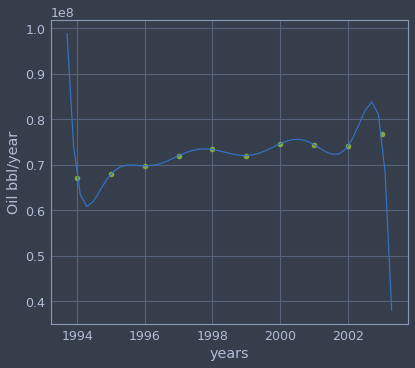

In [41]:
x=np.linspace(-.3+min(year),.3+max(year))
plt.plot(year,bbl4year,'go')
plt.plot(x,modelb(x))
plt.xlabel('years')
plt.ylabel('Oil bbl/year')

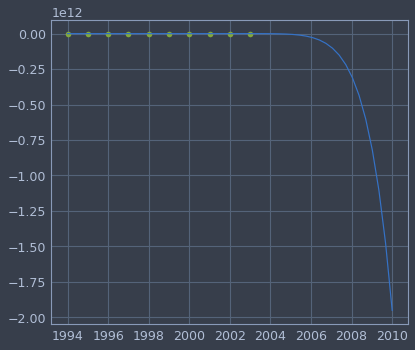

In [44]:
x=np.linspace(min(year),2010)
plt.plot(year,bbl4year,'go')
plt.plot(x,modelb(x))

In [46]:
modelb(2010)

array(-1.95164613e+12)

Use the degree 3 polynomial through the first four data points in the last problem to
estimate the 1998 world oil production. Is the Runge phenomenon present?

In [47]:
year = np.arange(1994,1998)
bbl4year = np.array([67.052, 68.008, 69.803, 72.024])*1e6
c=newtdd(year,bbl4year)
modelb=nested_mult(c,b=year[:-1])

Text(0, 0.5, 'Oil bbl/year')

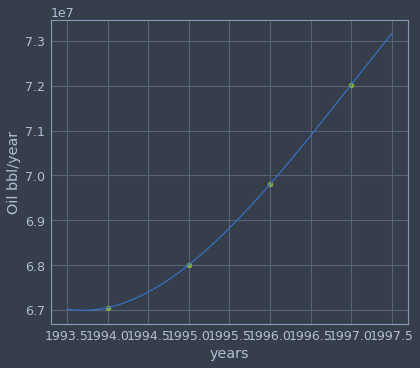

In [49]:
x=np.linspace(-.5+min(year),.5+max(year))
plt.plot(year,bbl4year,'go')
plt.plot(x,modelb(x))
plt.xlabel('years')
plt.ylabel('Oil bbl/year')